In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [8]:
data = pd.read_csv('diabetes.csv')

In [9]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
data.corr().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Check the standard normal form

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [12]:
## input features
data = data.drop(columns=['Outcome'], axis=1)
## convert the data into standard scaler form
## mean = 0 and standard deviation = 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataScaled = scaler.fit_transform(data)
dataScaled = pd.DataFrame(dataScaled)
dataScaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [16]:
dataScaled.describe()


,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


### Find Covariance Matrix

In [17]:
covarianceMatrix = dataScaled.T @ dataScaled / 767
covarianceMatrix

,0,1,2,3,4,5,6,7
0,1.001304,0.129627,0.141466,-0.081778,-0.073630,0.017706,-0.033566,0.545051
1,0.129627,1.001304,0.152789,0.057403,0.331789,0.221359,0.137516,0.263858
2,0.141466,0.152789,1.001304,0.207641,0.089049,0.282173,0.041319,0.239840
3,-0.081778,0.057403,0.207641,1.001304,0.437352,0.393085,0.184167,-0.114119
4,-0.073630,0.331789,0.089049,0.437352,1.001304,0.198117,0.185312,-0.042218
5,0.017706,0.221359,0.282173,0.393085,0.198117,1.001304,0.140830,0.036289
6,-0.033566,0.137516,0.041319,0.184167,0.185312,0.140830,1.001304,0.033605
7,0.545051,0.263858,0.239840,-0.114119,-0.042218,0.036289,0.033605,1.001304


### Evaluate the EigenValues and EigenVectors using the Covariance Matrix

In [18]:
eigenValues, eigenVectors = np.linalg.eig(covarianceMatrix)
print(eigenValues)

[2.09711056 1.73346726 0.42036353 0.40498938 0.68351839 0.76333832
 0.87667054 1.03097228]


###  Select Principal Components:

In [19]:
## PC1 data
PC1_data = dataScaled @ eigenVectors[:, 0]
## PC2 data
PC2_data = dataScaled @ eigenVectors[:, 1]
## PC3 data
PC3_data = dataScaled @ eigenVectors[:, 7]

In [23]:
print(PC1_data,PC2_data,PC3_data )

0     -1.068503
1      1.121683
2      0.396477
3      1.115781
4     -2.359334
         ...   
763   -1.562085
764    0.100405
765    0.283475
766    1.060324
767    0.839892
Length: 768, dtype: float64 0     -1.234895
1      0.733852
2     -1.595876
3      1.271241
4      2.184819
         ...   
763   -1.923150
764    0.614181
765   -0.097065
766   -0.837062
767    1.151755
Length: 768, dtype: float64 0     -0.095930
1      0.712938
2     -1.760678
3      0.663729
4     -2.963107
         ...   
763    0.867408
764    0.764353
765    0.077192
766   -0.425030
767    1.009178
Length: 768, dtype: float64


###  PCA Implementation via the sklearn library

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) #create only 3 pca components
pca.fit_transform(dataScaled)

array([[ 1.06850273,  1.23489499,  0.09592984],
       [-1.12168331, -0.73385167, -0.71293816],
       [-0.39647671,  1.59587594,  1.76067844],
       ...,
       [-0.28347525,  0.09706503, -0.07719194],
       [-1.06032431,  0.83706234,  0.42503045],
       [-0.83989172, -1.15175485, -1.00917817]])

### Calculate the explained variance ratio

In [ ]:
from sklearn.decomposition import PCA
pca = PCA() # optimal number of pca
principalComponent = pca.fit_transform(dataScaled)
pca.explained_variance_ratio_

array([0.26179749, 0.21640127, 0.12870373, 0.10944113, 0.09529305,
       0.08532855, 0.05247702, 0.05055776])

### Visualizing Cumulative Explained Variance in PCA

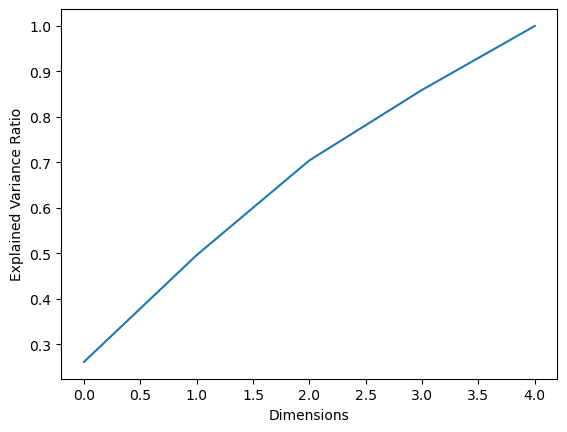

In [30]:
# craete the plot to get the optimal number of PCA values
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance Ratio")
plt.savefig("ScreenPlot.png")
plt.show()